In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

# 그래프에서 '-' 기호가 문제가 생길 수 있음
mpl.rcParams['axes.unicode_minus'] = False

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [51]:
weather = pd.read_csv('./data/기상데이터_18~20.csv', encoding='cp949')

In [52]:
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
0,108,서울,2018-01-01,-1.3,NaN,1.4,290,2.1,1016.8,6.14,1.0,-1.7
1,108,서울,2018-01-02,-1.8,NaN,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2,108,서울,2018-01-03,-4.7,NaN,2.2,290,1.8,1019.9,6.56,3.6,-3.4
3,108,서울,2018-01-04,-4.7,NaN,1.4,290,1.8,1016.5,4.73,6.5,-3.3
4,108,서울,2018-01-05,-3.0,NaN,1.7,290,2.4,1010.3,5.96,3.6,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,108,서울,2020-12-27,5.8,0.0,1.8,70,5.8,1011.0,8.12,7.5,1.4
1092,108,서울,2020-12-28,6.7,1.3,1.4,50,6.9,1012.6,9.12,5.3,2.7
1093,108,서울,2020-12-29,0.1,0.2,2.9,270,4.6,1011.0,1.98,8.5,-0.1
1094,108,서울,2020-12-30,-10.9,NaN,4.1,270,1.5,1012.5,11.36,0.8,-4.4


# 1. 결치값 처리

In [53]:
weather.drop(['지점', '지점명'], axis=1, inplace=True)
weather.isnull().sum()

일시                 0
평균기온(°C)           0
일강수량(mm)         678
평균 풍속(m/s)         0
최다풍향(16방위)         0
평균 증기압(hPa)        0
평균 현지기압(hPa)       1
합계 일사량(MJ/m2)      5
평균 전운량(1/10)       0
평균 지면온도(°C)        0
dtype: int64

In [54]:
# 강수량 null=> 0
weather['일강수량(mm)'].fillna(0, inplace=True)

In [55]:
weather[weather['평균 현지기압(hPa)'].isnull()]

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
985,2020-09-12,20.2,5.7,2.0,50,19.7,NaN,7.34,9.5,21.5


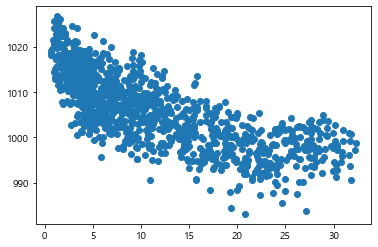

In [56]:
plt.scatter(weather['평균 증기압(hPa)'], weather['평균 현지기압(hPa)'])
plt.show()

In [57]:
weather.iloc[985]['평균 증기압(hPa)']

19.7

In [58]:
from sklearn.linear_model import LinearRegression

# null 값 제거 데이터
weather_without_null = weather[~weather['평균 현지기압(hPa)'].isnull()]

model = LinearRegression()
model.fit(weather_without_null['평균 증기압(hPa)'].values.reshape(-1,1), weather_without_null['평균 현지기압(hPa)'].values.reshape(-1,1))
null_hpa = model.predict(weather.iloc[985]['평균 증기압(hPa)'].reshape(-1,1))
print(null_hpa)

weather['평균 현지기압(hPa)'].fillna(round(null_hpa[0][0]), inplace=True)
weather.isnull().sum()

[[1000.03123562]]


일시               0
평균기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
최다풍향(16방위)       0
평균 증기압(hPa)      0
평균 현지기압(hPa)     0
합계 일사량(MJ/m2)    5
평균 전운량(1/10)     0
평균 지면온도(°C)      0
dtype: int64

In [59]:
weather[weather['합계 일사량(MJ/m2)'].isnull()]

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
17,2018-01-18,2.1,0.0,1.9,290,4.3,1012.9,NaN,8.6,1.3
25,2018-01-26,-14.8,0.0,2.6,320,0.7,1018.9,NaN,0.0,-9.3
45,2018-02-15,-0.7,0.0,2.5,290,1.6,1011.5,NaN,3.8,0.9
604,2019-08-28,26.1,0.0,1.9,270,21.9,996.6,NaN,5.9,27.7
605,2019-08-29,23.4,36.9,2.2,160,22.0,995.9,NaN,5.6,25.9


In [60]:
weather_without_null = weather.dropna()

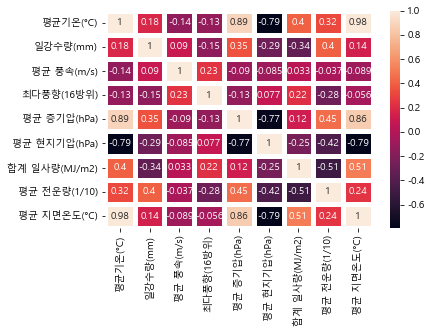

In [61]:
sns.heatmap(weather_without_null.drop('일시', axis=1).corr(), annot=True, linewidths=5)
plt.show()

In [62]:
weather['합계 일사량(MJ/m2)'].describe()

count    1091.000000
mean       13.930275
std         7.079930
min         0.540000
25%         8.560000
50%        13.210000
75%        19.385000
max        30.350000
Name: 합계 일사량(MJ/m2), dtype: float64

In [63]:
# 평균으로 채움
weather['합계 일사량(MJ/m2)'].fillna(round(weather['합계 일사량(MJ/m2)'].mean(),2), inplace=True)

# 2. 이상치 처리

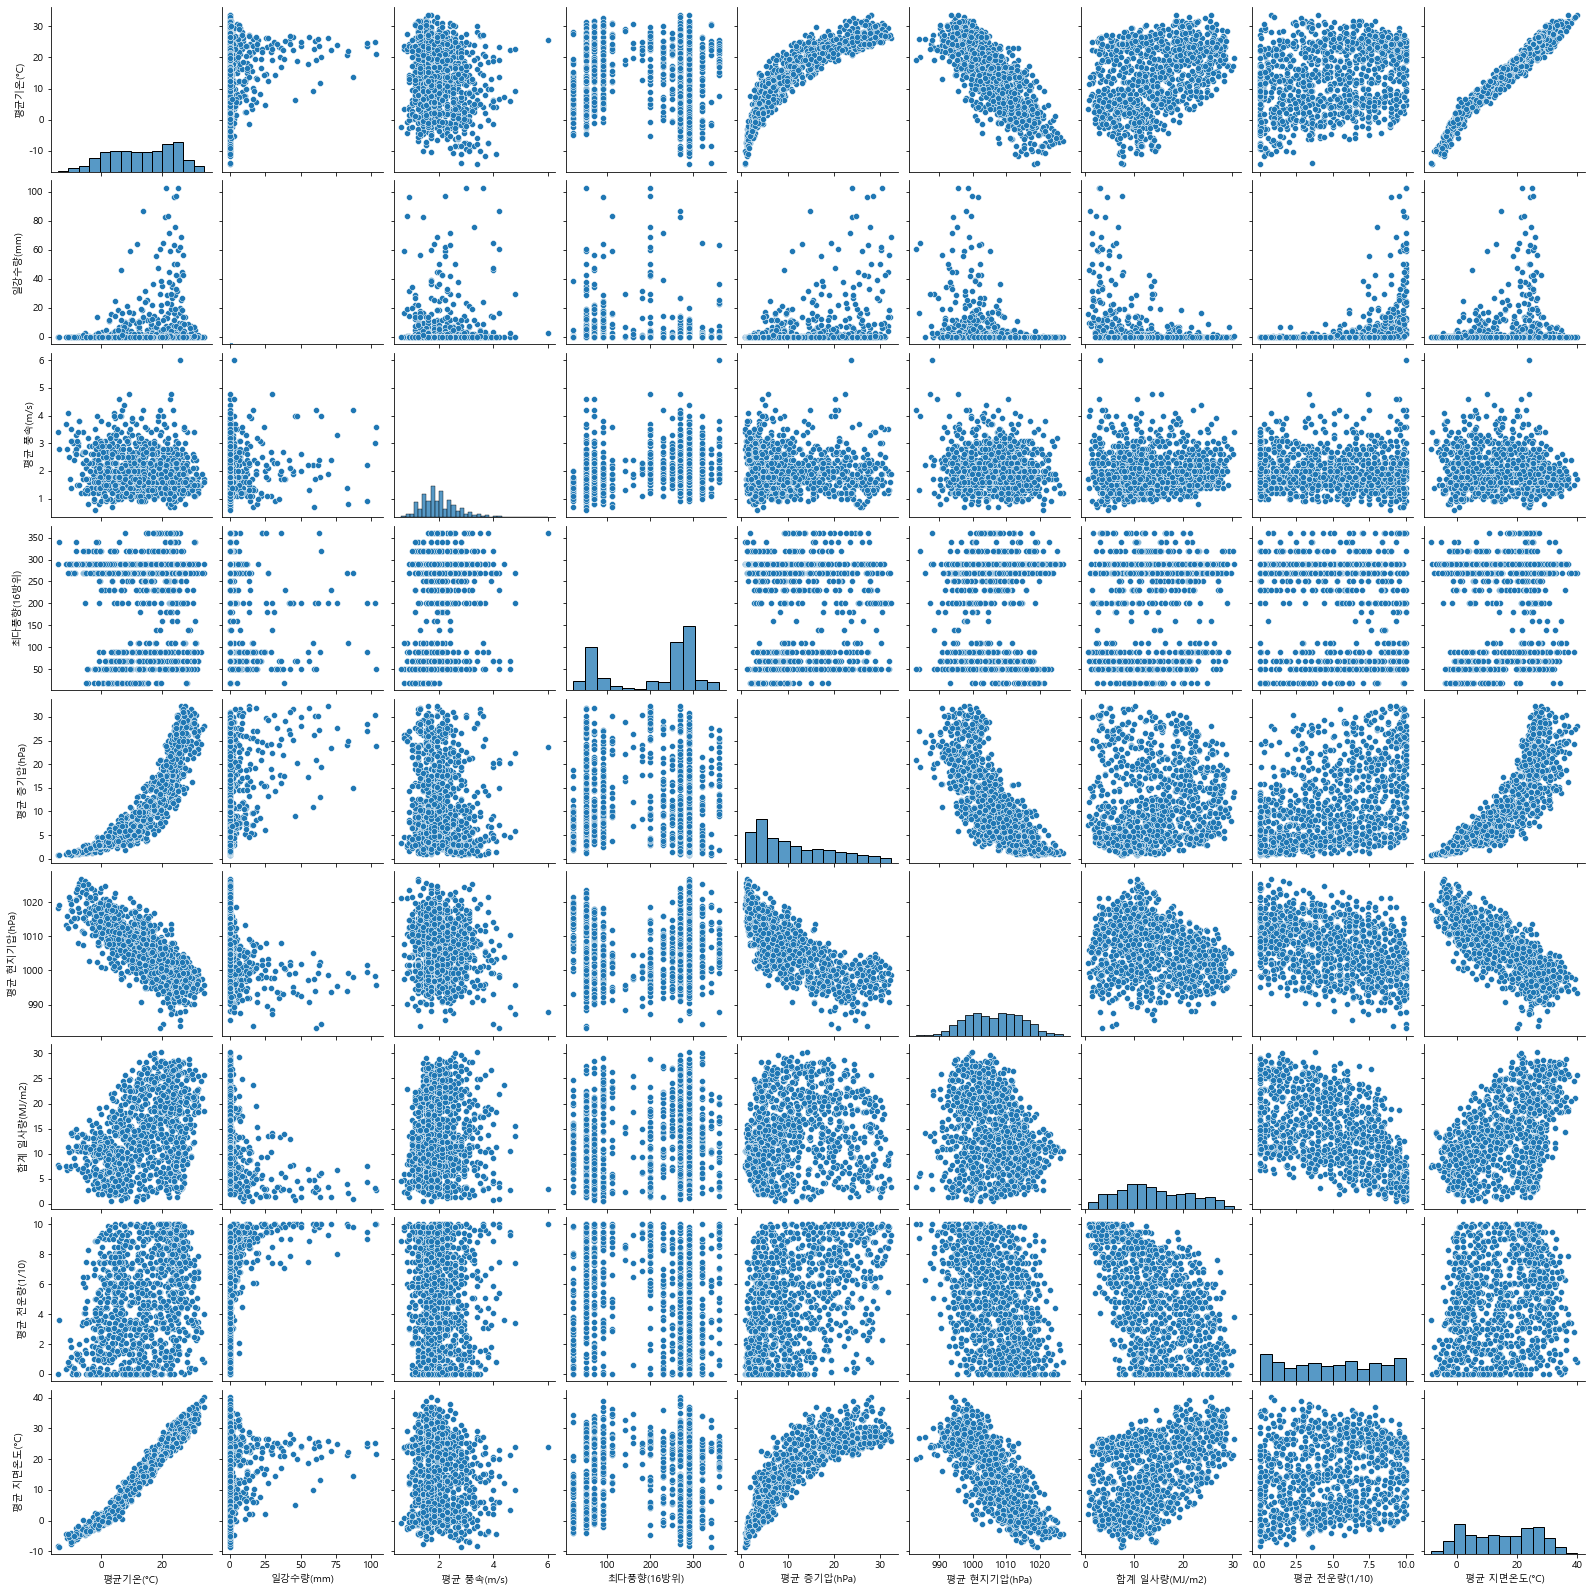

In [64]:

sns.pairplot(weather_without_null.drop('일시', axis=1))
plt.show()

평균 풍속에 이상한 점이 하나 보임
다른 요소들에서는 특별한 점은 찾을 수 없음

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac8657ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac865889a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac86588220>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac86588f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac86592160>],
 'means': []}

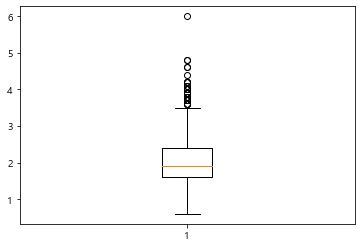

In [65]:
plt.boxplot(weather['평균 풍속(m/s)'])

In [66]:
weather[weather['평균 풍속(m/s)'] == weather['평균 풍속(m/s)'].max()]

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
614,2019-09-07,25.7,2.8,6.0,360,23.7,987.7,2.95,10.0,24.1


In [67]:
weather['평균 풍속(m/s)'].describe()

count    1096.000000
mean        2.017245
std         0.689387
min         0.600000
25%         1.600000
50%         1.900000
75%         2.400000
max         6.000000
Name: 평균 풍속(m/s), dtype: float64

평균 현지기압으로 보아 이상한 값이 적힌 것이 아니라 태풍에 의한 빠른 풍속으로 생각됨

### 독립변수 데이터 확인

In [68]:
col = list(weather.columns)
del col[0]
col

['평균기온(°C)',
 '일강수량(mm)',
 '평균 풍속(m/s)',
 '최다풍향(16방위)',
 '평균 증기압(hPa)',
 '평균 현지기압(hPa)',
 '합계 일사량(MJ/m2)',
 '평균 전운량(1/10)',
 '평균 지면온도(°C)']

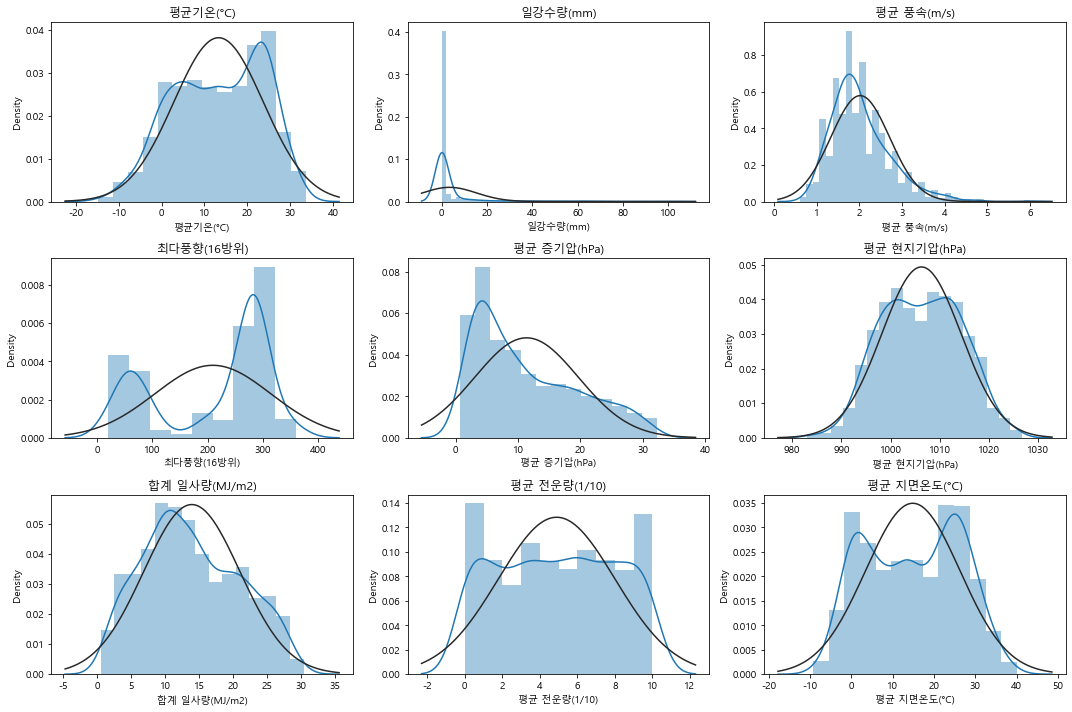

In [69]:
from scipy.stats import norm
fig = plt.figure(figsize=(15,10))

for i, c in enumerate(col):
    ax = fig.add_subplot(3,3, i+1)
    sns.distplot(weather[c], fit=norm)
    ax.set_title(c)

plt.tight_layout()
plt.show()

# 대기질 데이터 로드

In [70]:
import os
file_path = ['./data/대기질데이터 2018','./data/대기질데이터 2019','./data/대기질데이터 2020']
monthly_air_quality = []
for i,pth in enumerate(file_path) :
    for j, file in enumerate(os.listdir(pth)) :
        df = pd.read_excel(os.path.join(pth, file))
        df = df.drop([df.index[0]])
        monthly_air_quality.append(df)

air_quality = pd.concat(monthly_air_quality, axis=0)

# 1. 결측치 처리

In [71]:
air_quality.isnull().sum()

날짜        0
PM10      1
PM2.5     1
오 존       4
이산화질소     3
일산화탄소    57
아황산가스     3
dtype: int64

In [72]:
finedust = pd.DataFrame({'날짜':air_quality['날짜'],
                         'PM10':air_quality['PM10']})
finedust

,날짜,PM10
1,2018-01-01,33
2,2018-01-02,32
3,2018-01-03,30
4,2018-01-04,39
5,2018-01-05,48
...,...,...
26,2020-09-28,27
27,2020-09-29,37
28,2020-09-30,36
29,2020-09-24,12


종속변수의 결측치 -> KNN으로 예측해서 대체

In [73]:
# 날짜를 인덱스로 사용하기
def use_data_as_index(df, s):
    df.set_index(df[s], inplace=True)
    df.drop(s, axis=1, inplace=True)
    return df
weather = use_data_as_index(weather, '일시')
finedust = use_data_as_index(finedust, '날짜')

In [74]:
finedust

,PM10
날짜,
2018-01-01,33
2018-01-02,32
2018-01-03,30
2018-01-04,39
2018-01-05,48
...,...
2020-09-28,27
2020-09-29,37
2020-09-30,36


In [75]:
finedust[finedust['PM10'].isnull()]

,PM10
날짜,
2020-05-24,NaN


In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

knn_x_data = weather.drop(['2020-05-24'], axis=0, inplace=False)
knn_t_data = finedust.drop(['2020-05-24'], axis=0, inplace=False)
scaler_x = MinMaxScaler(knn_x_data)
scaler_t = MinMaxScaler(knn_t_data)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(knn_x_data, knn_t_data)
null_predict = knn.predict(weather.loc['2020-05-24'].values.reshape(-1,9))
print(null_predict)

[[48.666666666666664]]


In [77]:
finedust['PM10'].fillna(round(null_predict[0][0], 2), inplace=True)

In [78]:
finedust.isnull().sum()

PM10    0
dtype: int64

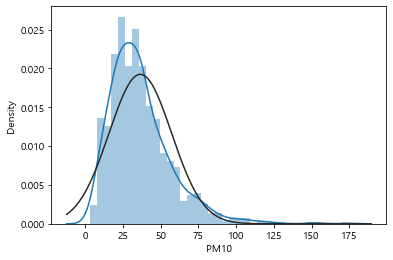

In [79]:
sns.distplot(finedust['PM10'], fit=norm)
plt.show()

In [80]:
total_df = pd.merge(finedust, weather,
                    left_index=True,
                    right_index=True,
                    how='inner')
total_df.head()

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
2018-01-01,33.0,-1.3,0.0,1.4,290,2.1,1016.8,6.14,1.0,-1.7
2018-01-02,32.0,-1.8,0.0,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2018-01-03,30.0,-4.7,0.0,2.2,290,1.8,1019.9,6.56,3.6,-3.4
2018-01-04,39.0,-4.7,0.0,1.4,290,1.8,1016.5,4.73,6.5,-3.3
2018-01-05,48.0,-3.0,0.0,1.7,290,2.4,1010.3,5.96,3.6,-2.6


In [81]:
total_df.shape

(1096, 10)

In [82]:
total_df.isnull().sum()

PM10             0
평균기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
최다풍향(16방위)       0
평균 증기압(hPa)      0
평균 현지기압(hPa)     0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
평균 지면온도(°C)      0
dtype: int64

In [83]:
total_df.index.names=['날짜']

In [84]:
total_df.head()

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
날짜,,,,,,,,,,
2018-01-01,33.0,-1.3,0.0,1.4,290,2.1,1016.8,6.14,1.0,-1.7
2018-01-02,32.0,-1.8,0.0,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2018-01-03,30.0,-4.7,0.0,2.2,290,1.8,1019.9,6.56,3.6,-3.4
2018-01-04,39.0,-4.7,0.0,1.4,290,1.8,1016.5,4.73,6.5,-3.3
2018-01-05,48.0,-3.0,0.0,1.7,290,2.4,1010.3,5.96,3.6,-2.6


In [85]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 2018-01-01 to 2020-09-23
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM10           1096 non-null   float64
 1   평균기온(°C)       1096 non-null   float64
 2   일강수량(mm)       1096 non-null   float64
 3   평균 풍속(m/s)     1096 non-null   float64
 4   최다풍향(16방위)     1096 non-null   int64  
 5   평균 증기압(hPa)    1096 non-null   float64
 6   평균 현지기압(hPa)   1096 non-null   float64
 7   합계 일사량(MJ/m2)  1096 non-null   float64
 8   평균 전운량(1/10)   1096 non-null   float64
 9   평균 지면온도(°C)    1096 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 94.2+ KB


In [86]:
total_df.to_csv('./data/finedust_predict(2018~2020).csv', encoding='utf-8-sig')